In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 1: Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries and load the Excel file
import pandas as pd

# Define the file path where the dataset is located in Google Drive
file_path = '/content/drive/My Drive/Data+Dictionary-+Telecom+Churn+Case+Study.xlsx'

# Load the Excel file into a pandas DataFrame
data = pd.read_excel(file_path)

# Step 3: Display the first few rows of the dataset to verify it's loaded correctly
data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls


In [ ]:
# Step 4: Understand the dataset

# 4.1: Display basic information about the dataset
data.info()

# 4.2: Display summary statistics of the dataset
summary_statistics = data.describe()
print(summary_statistics)

# 4.3: Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Acronyms      38 non-null     object
 1   Descriptions  38 non-null     object
dtypes: object(2)
memory usage: 736.0+ bytes
         Acronyms               Descriptions
count              38                     38
unique             38                     38
top     MOBILE_NUMBER  Customer phone number
freq                1                      1
Missing values in each column:
 Acronyms        0
Descriptions    0
dtype: int64


In [ ]:
# Step 5: Load the customer usage data from the CSV file

# Load the customer data
customer_data_path = '/content/drive/My Drive/telecom_churn_data.csv'  # Path to the CSV file
customer_data = pd.read_csv(customer_data_path)  # Read the CSV file

# Display the first few rows of the customer data
customer_data.head()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [ ]:
# Step 6: Explore the customer data

# Get the shape of the dataset (number of rows and columns)
data_shape = customer_data.shape

# Get basic information about the dataset
data_info = customer_data.info()

# Get descriptive statistics of the numerical columns
data_description = customer_data.describe()

# Check for missing values in the dataset
missing_values = customer_data.isnull().sum()

# Display results
print(f"Shape of the dataset: {data_shape}")
print("\nBasic Information:")
print(data_info)
print("\nDescriptive Statistics:")
print(data_description)
print("\nMissing Values:")
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
Shape of the dataset: (99999, 226)

Basic Information:
None

Descriptive Statistics:
       mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000 

In [ ]:
# Step 7: Handling Missing Values

# Calculate the percentage of missing values for each column
missing_percentage = (customer_data.isnull().sum() / len(customer_data)) * 100

# Display columns with missing values greater than 0
missing_data = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Display the percentage of missing values
print("Percentage of Missing Values in Each Column:")
print(missing_data)


Percentage of Missing Values in Each Column:
count_rech_2g_6         74.846748
max_rech_data_6         74.846748
arpu_3g_6               74.846748
av_rech_amt_data_6      74.846748
count_rech_3g_6         74.846748
                          ...    
last_date_of_month_8     1.100011
std_og_t2o_mou           1.018010
loc_ic_t2o_mou           1.018010
loc_og_t2o_mou           1.018010
last_date_of_month_7     0.601006
Length: 166, dtype: float64


In [ ]:
# Step 9: Check for Missing Values Again
missing_data = customer_data_cleaned.isnull().mean() * 100  # Percentage of missing values

# Step 10: Identify Columns to Drop with more than 50% missing values
threshold = 50
cols_to_drop = missing_data[missing_data > threshold].index.intersection(customer_data_cleaned.columns)

# Drop Columns that exist in the DataFrame
customer_data_cleaned = customer_data_cleaned.drop(columns=cols_to_drop, errors='ignore')

# Step 11: Fill missing values for remaining columns (less than 5% missing) with the mean
for column in customer_data_cleaned.columns:
    if customer_data_cleaned[column].isnull().sum() > 0:
        customer_data_cleaned[column].fillna(customer_data_cleaned[column].mean(), inplace=True)

# Confirm the number of missing values in the cleaned dataset
missing_values_after_cleaning = customer_data_cleaned.isnull().sum().sum()
print(f"Total missing values after cleaning: {missing_values_after_cleaning}")



Total missing values after cleaning: 0


In [ ]:
# exploratory data analysis
# Step 1: Get descriptive statistics for numerical columns
descriptive_stats = customer_data_cleaned.describe()
print(descriptive_stats)


       mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         99999.0         99999.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         99999.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.5

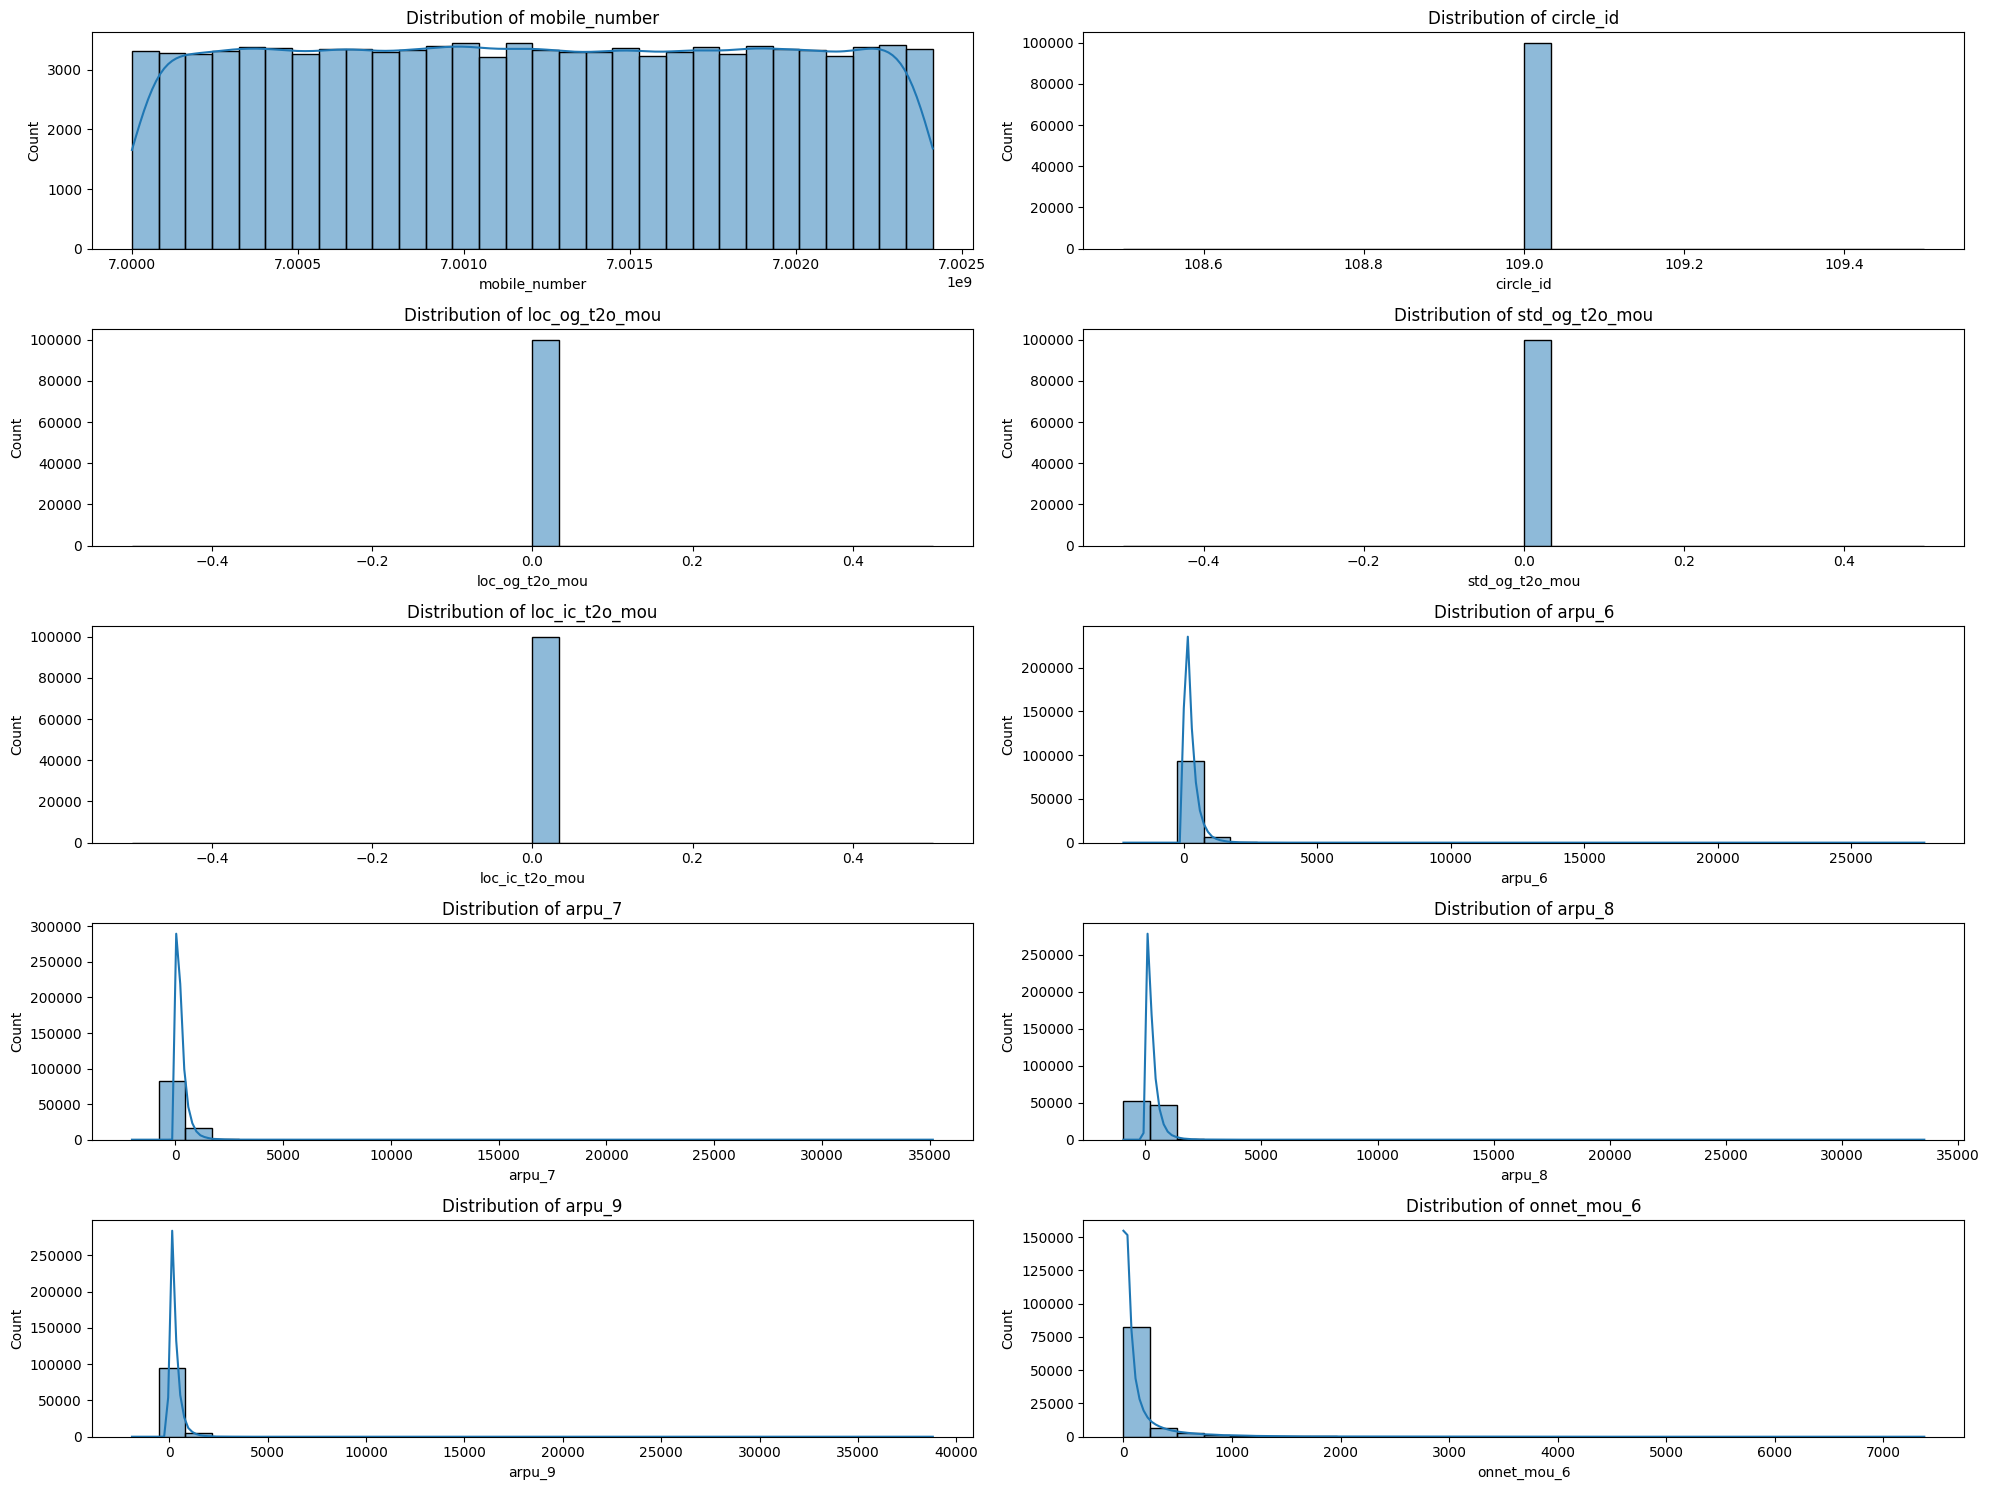

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Plot histograms for numerical features
numerical_cols = customer_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Plot histogram for top 10 numerical columns based on importance (to avoid overcrowding)
top_numerical_cols = numerical_cols[:10]  # Adjust as needed to visualize specific columns

plt.figure(figsize=(20, 15))
for idx, col in enumerate(top_numerical_cols, 1):
    plt.subplot(5, 2, idx)  # 5 rows, 2 columns per plot
    sns.histplot(customer_data_cleaned[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


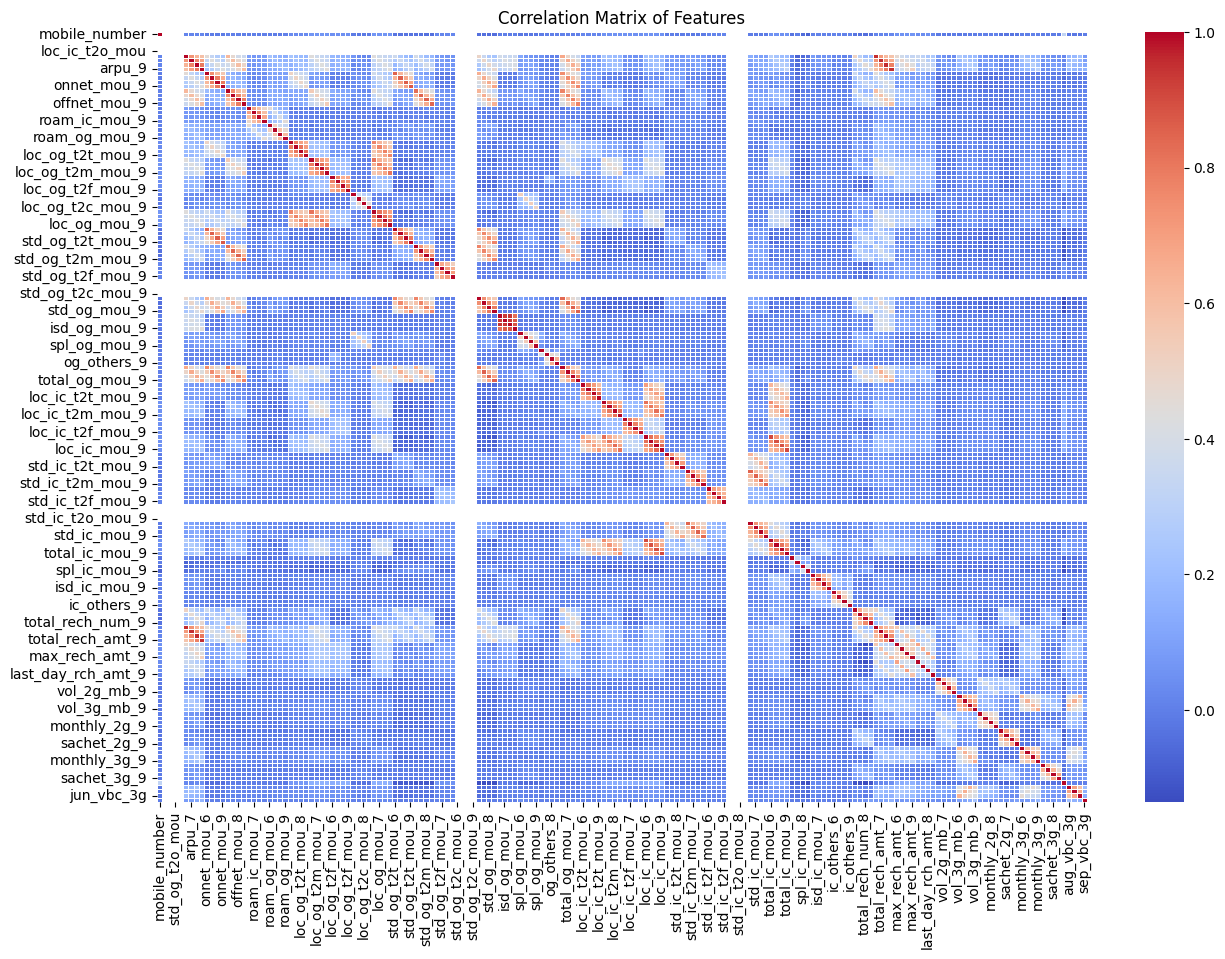

In [11]:
# Step 3: Calculate and plot correlation matrix for numerical features
plt.figure(figsize=(15, 10))

# Select only numeric columns (excluding any non-numeric data like dates)
numeric_cols = customer_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr_matrix = customer_data_cleaned[numeric_cols].corr()

# Plot heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


Top Correlated Feature Pairs (Threshold > 0.7):
total_rech_amt_8  arpu_8              0.955952
arpu_8            total_rech_amt_8    0.955952
total_rech_amt_6  arpu_6              0.953017
arpu_6            total_rech_amt_6    0.953017
arpu_9            total_rech_amt_9    0.952310
                                        ...   
loc_ic_t2t_mou_6  loc_ic_mou_6        0.703627
sachet_2g_7       sachet_2g_6         0.702248
sachet_2g_6       sachet_2g_7         0.702248
loc_ic_mou_8      loc_ic_t2t_mou_8    0.701390
loc_ic_t2t_mou_8  loc_ic_mou_8        0.701390
Length: 324, dtype: float64


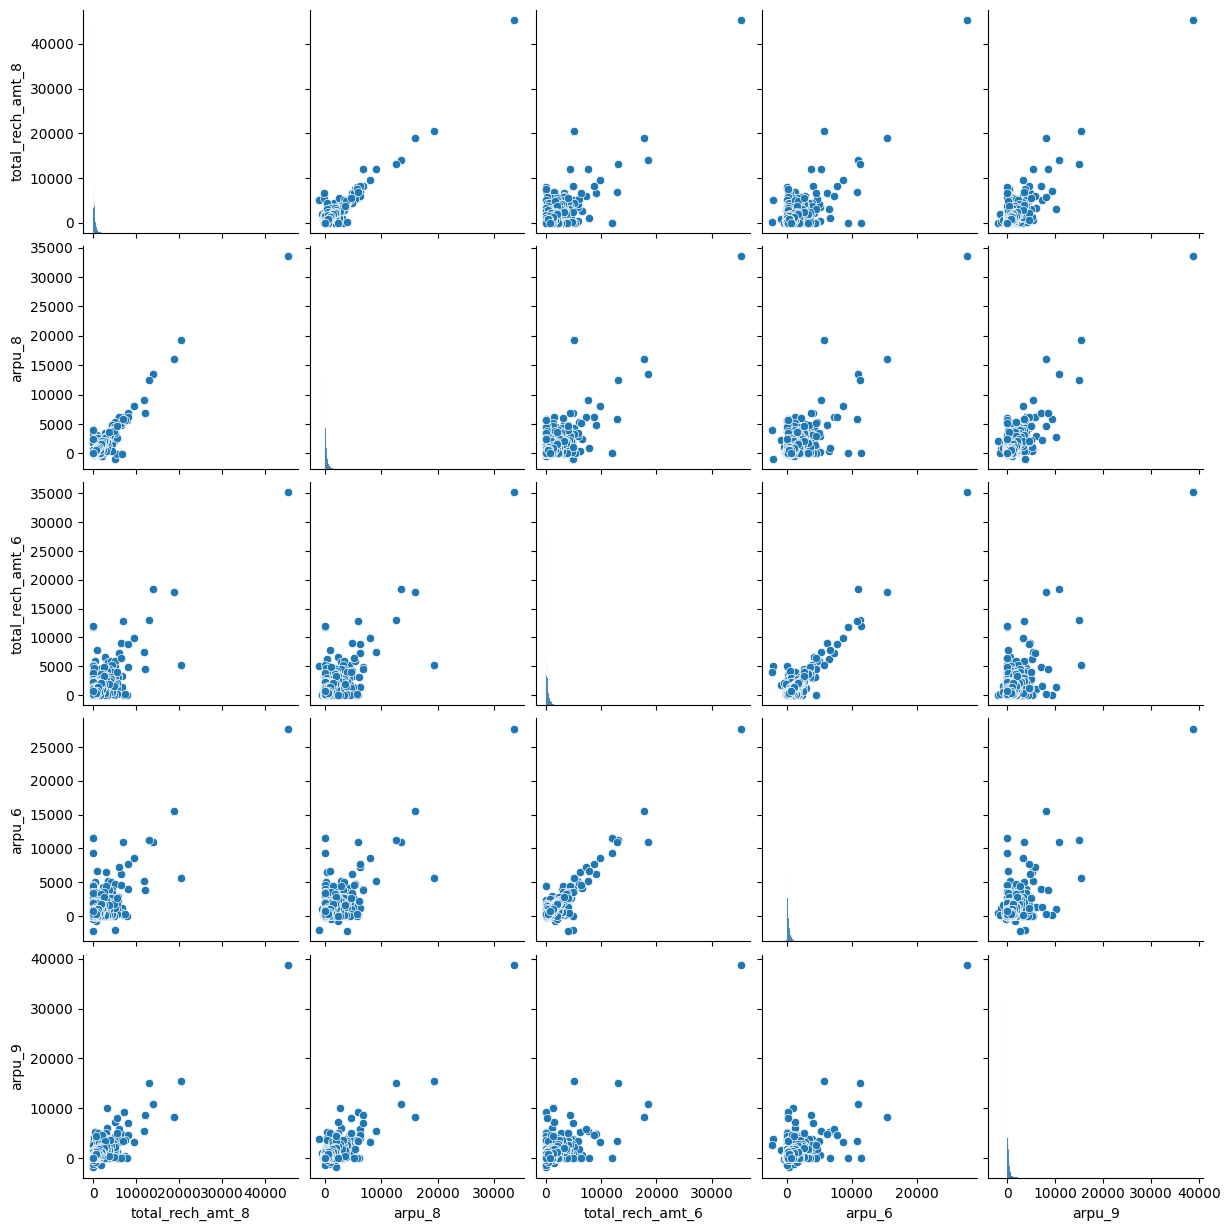

In [12]:
# Step 4: Identify highly correlated features
threshold = 0.7

# Find pairs of highly correlated features
high_corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]

# Filter out self-correlations (correlation of a feature with itself)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]

# Display top correlated pairs
print("Top Correlated Feature Pairs (Threshold > 0.7):")
print(high_corr_pairs)

# Visualize correlations using a pairplot (for the top few highly correlated features)
top_corr_features = high_corr_pairs.index.get_level_values(0)[:5]  # Get top 5 highly correlated features

# Plot pairplot
sns.pairplot(customer_data_cleaned[top_corr_features])
plt.show()


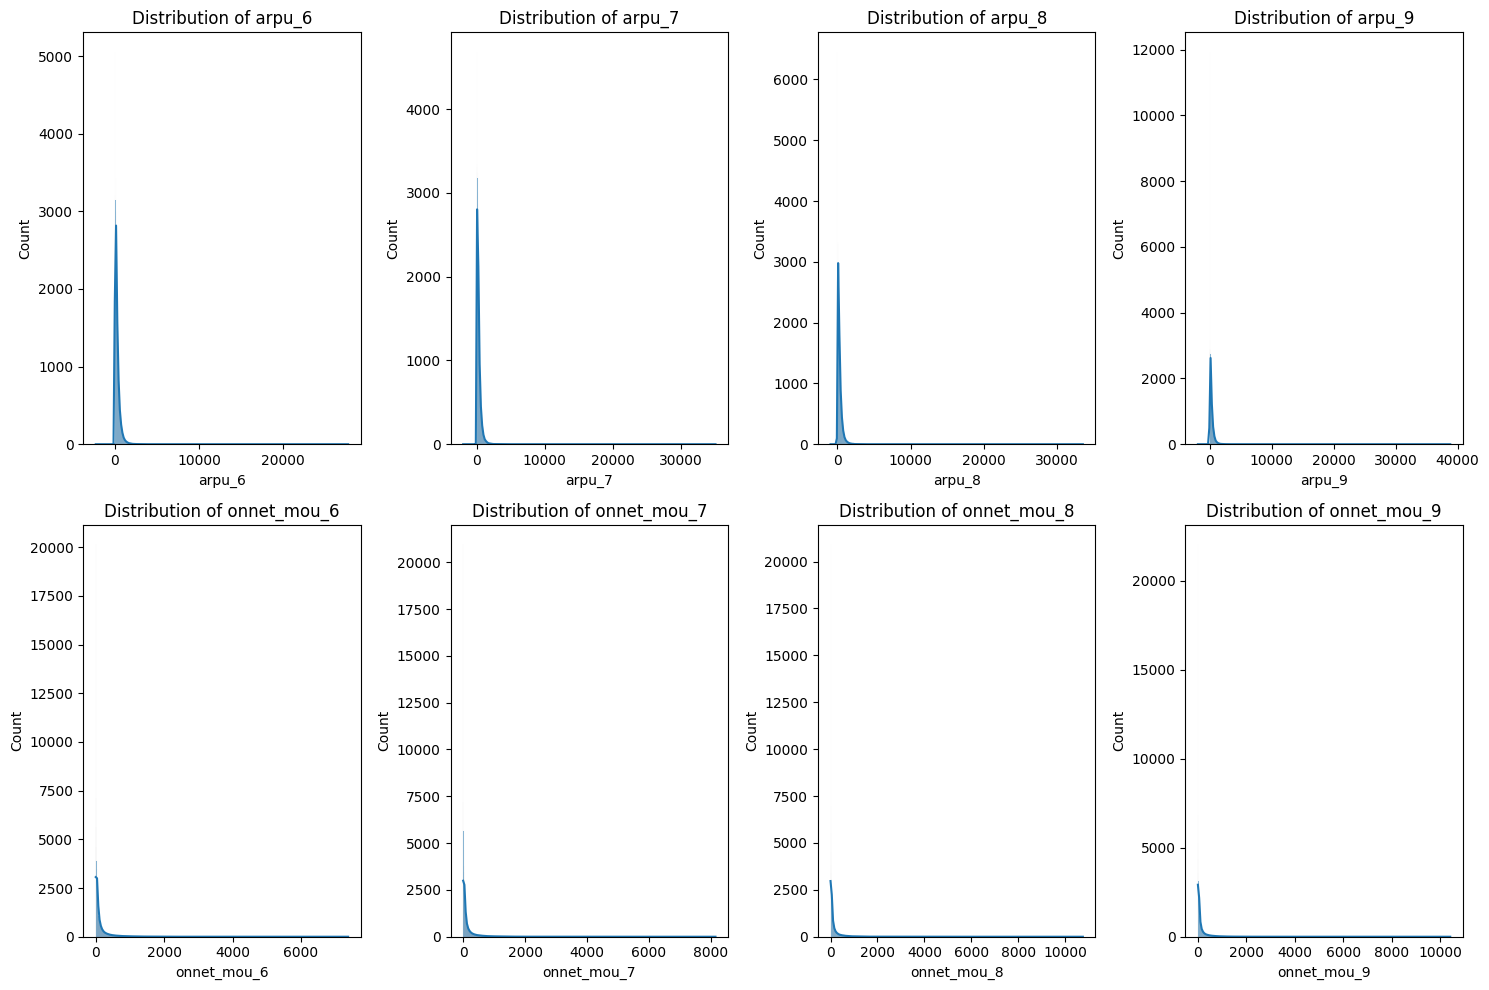

In [13]:
# Step 5: Visualize distributions of important features
important_features = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9']

# Plot histograms for the important features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(customer_data_cleaned[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


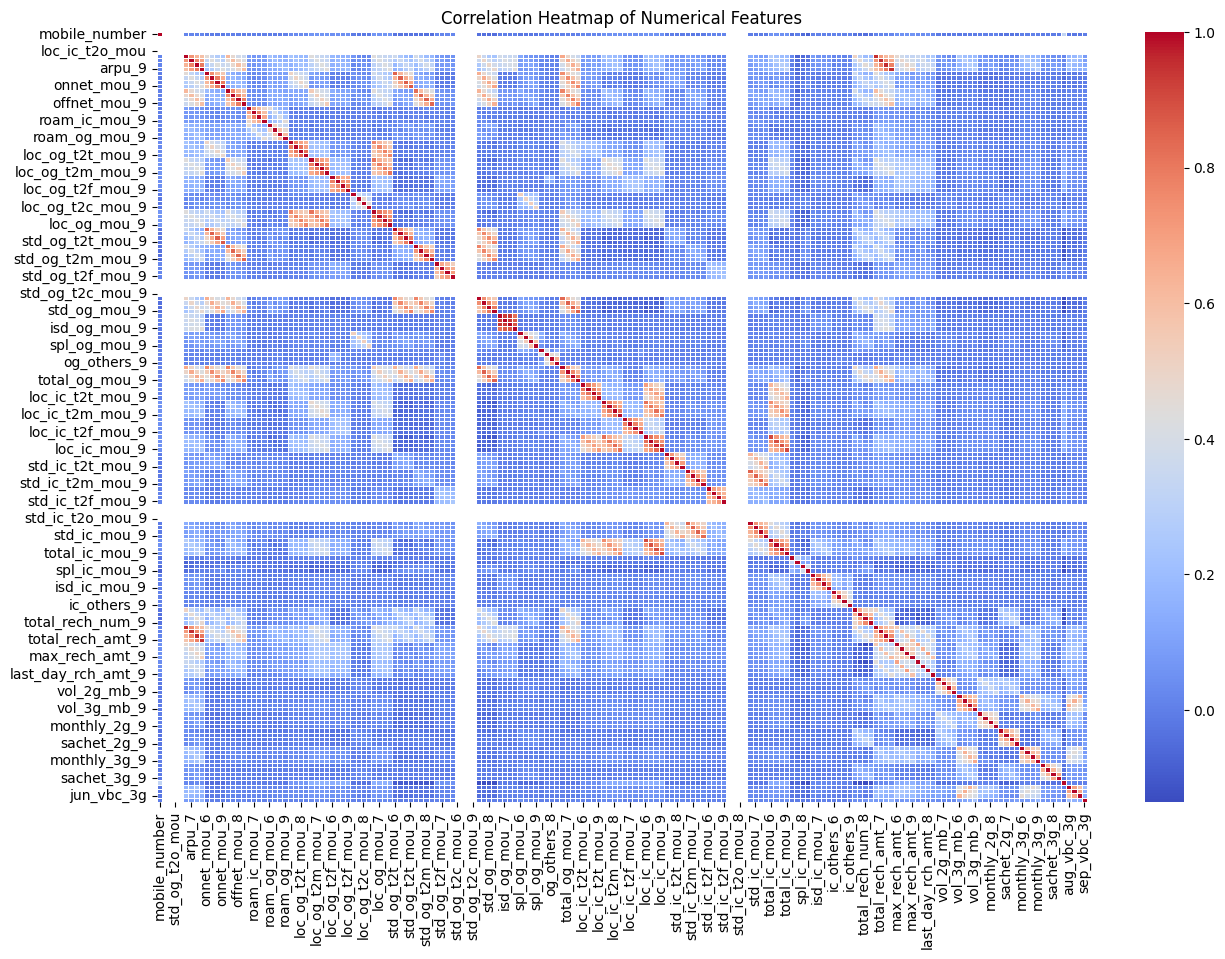

In [14]:
# Step 6: Correlation heatmap for numerical features

# Select numerical columns for correlation analysis
numerical_cols = customer_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = customer_data_cleaned[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


<ipython-input-15-8fdad38a0262>:17: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


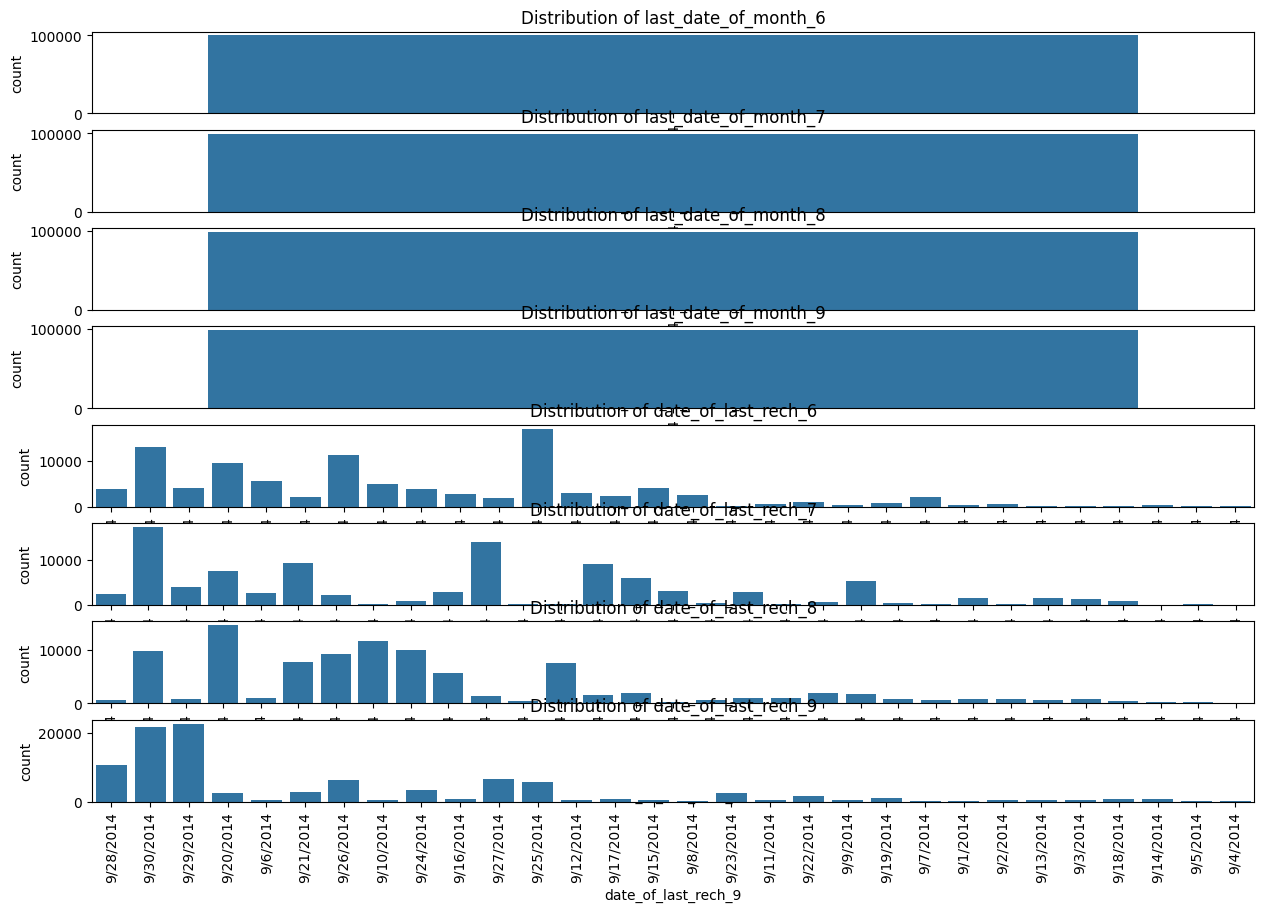

In [15]:
# Step 7: Visualize distribution of categorical features

# Select categorical columns
categorical_cols = customer_data_cleaned.select_dtypes(include=['object']).columns

# Check if there are any categorical columns
if len(categorical_cols) > 0:
    plt.figure(figsize=(15, 10))

    # Plot bar plots for each categorical column
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(len(categorical_cols), 1, i)
        sns.countplot(x=col, data=customer_data_cleaned)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found in the dataset.")


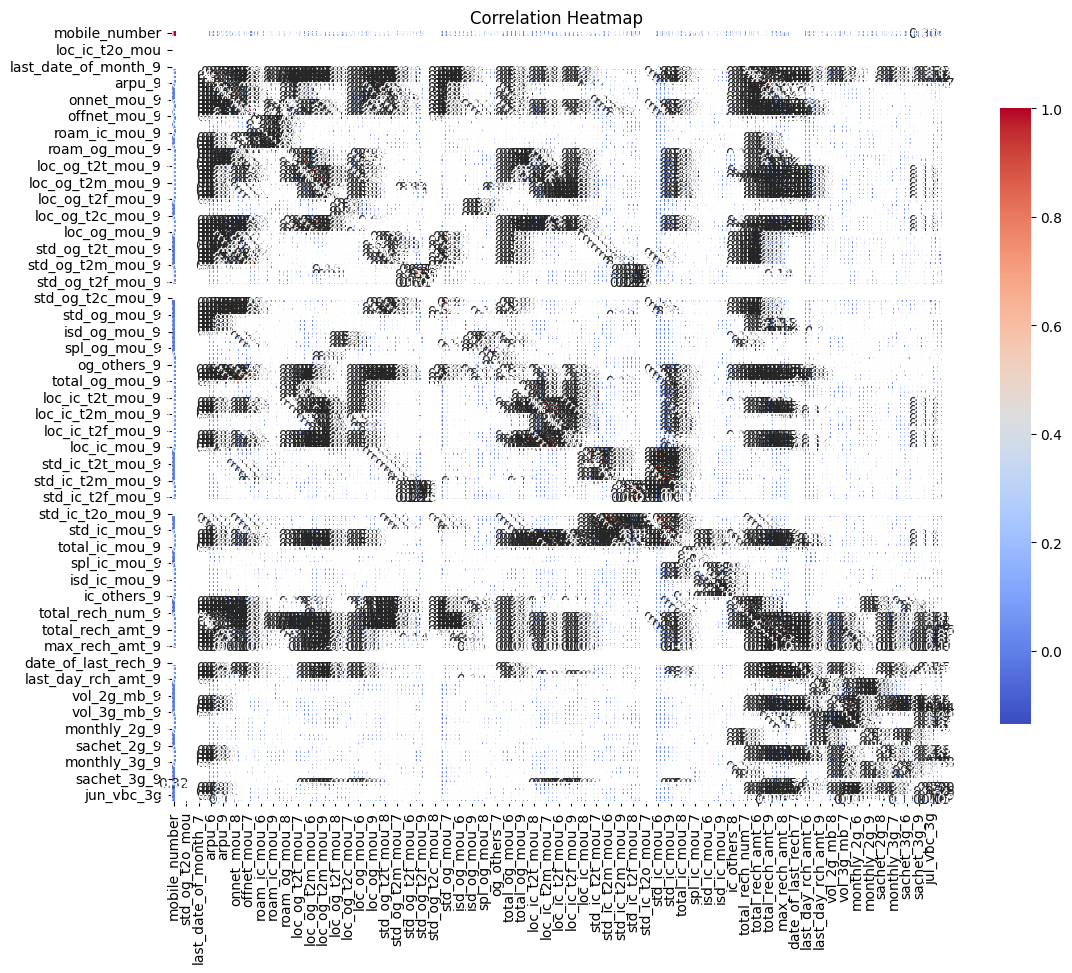

In [18]:
# Step 8: Convert columns to numeric where possible

# Convert all columns to numeric, coercing errors to NaN
customer_data_cleaned = customer_data_cleaned.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = customer_data_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()


In [19]:
# Step 9: Identify highly correlated features

# Set a correlation threshold
correlation_threshold = 0.8

# Find features with correlation above the threshold
high_correlation_pairs = []

# Get the upper triangle of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Display highly correlated feature pairs
print("Highly correlated feature pairs (correlation > {}):".format(correlation_threshold))
for pair in high_correlation_pairs:
    print(pair)



Highly correlated feature pairs (correlation > 0.8):
('arpu_9', 'arpu_8')
('onnet_mou_9', 'onnet_mou_8')
('loc_og_t2t_mou_8', 'loc_og_t2t_mou_7')
('loc_og_t2t_mou_9', 'loc_og_t2t_mou_8')
('loc_og_t2m_mou_8', 'loc_og_t2m_mou_7')
('loc_og_t2m_mou_9', 'loc_og_t2m_mou_8')
('loc_og_mou_6', 'loc_og_t2m_mou_6')
('loc_og_mou_7', 'loc_og_mou_6')
('loc_og_mou_8', 'loc_og_t2m_mou_8')
('loc_og_mou_8', 'loc_og_mou_7')
('loc_og_mou_9', 'loc_og_t2m_mou_9')
('loc_og_mou_9', 'loc_og_mou_8')
('std_og_t2t_mou_6', 'onnet_mou_6')
('std_og_t2t_mou_7', 'onnet_mou_7')
('std_og_t2t_mou_8', 'onnet_mou_8')
('std_og_t2t_mou_9', 'onnet_mou_9')
('std_og_t2m_mou_6', 'offnet_mou_6')
('std_og_t2m_mou_7', 'offnet_mou_7')
('std_og_t2m_mou_8', 'offnet_mou_8')
('std_og_t2m_mou_9', 'offnet_mou_9')
('std_og_mou_9', 'std_og_mou_8')
('isd_og_mou_7', 'isd_og_mou_6')
('isd_og_mou_8', 'isd_og_mou_6')
('isd_og_mou_8', 'isd_og_mou_7')
('isd_og_mou_9', 'isd_og_mou_6')
('isd_og_mou_9', 'isd_og_mou_7')
('isd_og_mou_9', 'isd_og_mou_8'

In [20]:
# Step 10: Remove one feature from each pair of highly correlated features

# Create a set to keep track of features to drop
features_to_drop = set()

# Loop through the pairs and add one feature from each pair to the drop list
for pair in high_correlation_pairs:
    features_to_drop.add(pair[1])  # Drop the second feature in each pair

# Drop the features from the DataFrame
customer_data_cleaned = customer_data_cleaned.drop(columns=features_to_drop)

# Display the remaining features
print("Remaining features after dropping correlated features:")
print(customer_data_cleaned.columns.tolist())


Remaining features after dropping correlated features:
['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_og_mou_9', 'og_others_6

In [23]:
# Step 11: Splitting the Data into Features and Target

from sklearn.model_selection import train_test_split

# Drop unnecessary columns such as mobile_number and circle_id as they are not predictive
X = customer_data_cleaned.drop(columns=['mobile_number', 'circle_id', 'churn'])

# The target variable is 'churn'
y = customer_data_cleaned['churn']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(79999, 139) (20000, 139) (79999,) (20000,)


In [27]:
# Step 12: Scaling the Features

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Initialize the imputer to handle missing values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both the training and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Check the shapes to ensure data integrity
print(X_train_scaled.shape, X_test_scaled.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['last_date_of_month_6' 'last_date_of_month_7' 'last_date_of_month_8'
 'last_date_of_month_9' 'date_of_last_rech_6' 'date_of_last_rech_7'
 'date_of_last_rech_8' 'date_of_last_rech_9']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['last_date_of_month_6' 'last_date_of_month_7' 'last_date_of_month_8'
 'last_date_of_month_9' 'date_of_last_rech_6' 'date_of_last_rech_7'
 'date_of_last_rech_8' 'date_of_last_rech_9']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


(79999, 131) (20000, 131)


In [28]:
# Step 13: Building and Training the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model on the scaled training data
logistic_model.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[18154    54]
 [  138  1654]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18208
           1       0.97      0.92      0.95      1792

    accuracy                           0.99     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.99      0.99      0.99     20000



In [30]:
# Step 14: Hyperparameter Tuning with Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']  # Only 'l2' penalty
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Initialize the Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_f1}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'C': 100, 'penalty': 'l2'}
Best F1 Score: 0.9756210277963447


In [31]:
# Step 15: Evaluating the Best Model on the Test Set

# Initialize the Logistic Regression model with the best parameters
best_log_reg = LogisticRegression(C=100, penalty='l2', solver='lbfgs', max_iter=1000)

# Fit the model on the training data
best_log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Confusion Matrix:
[[18138    70]
 [   16  1776]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18208
           1       0.96      0.99      0.98      1792

    accuracy                           1.00     20000
   macro avg       0.98      0.99      0.99     20000
weighted avg       1.00      1.00      1.00     20000



In [32]:
# Step 16: Saving the Model

import joblib

# Save the model
joblib.dump(best_log_reg, 'best_logistic_regression_model.pkl')
print("Model saved as 'best_logistic_regression_model.pkl'")



Model saved as 'best_logistic_regression_model.pkl'


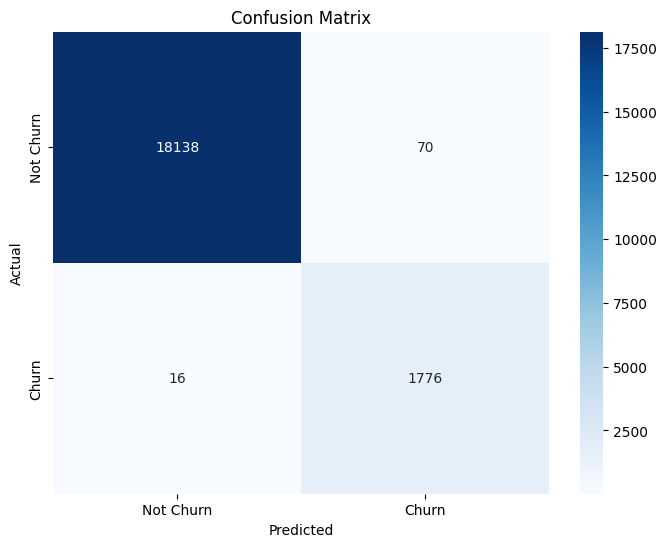

In [33]:
# Step 17: Visualizing the Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
